In [18]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a = 5
b = 7
c = a + b

In [19]:
fruit = c("a",'b','c')

In [20]:
print(fruit)

[1] "a" "b" "c"


In [21]:
print(c)

[1] 12


**Exercise 2: Petrol consumption**

In [22]:
#https://drive.google.com/file/d/1yRcPp5C7ckcluwWW0wgHtKd6D0IH_VR7/view?usp=sharing
system('gdown --id 1yRcPp5C7ckcluwWW0wgHtKd6D0IH_VR7')

In [23]:
# dataset understanding
data <- read.csv("petrol_consumption.csv")
print(is.data.frame(data))
print(paste("cols",ncol(data)))
print(paste("rows:",nrow(data)))
print(head(data))

[1] TRUE
[1] "cols 5"
[1] "rows: 48"
  Petrol_tax Average_income Paved_Highways Population_Driver_licence...
1        9.0           3571           1976                        0.525
2        9.0           4092           1250                        0.572
3        9.0           3865           1586                        0.580
4        7.5           4870           2351                        0.529
5        8.0           4399            431                        0.544
6       10.0           5342           1333                        0.571
  Petrol_Consumption
1                541
2                524
3                561
4                414
5                410
6                457


In [24]:
str(data)

summary(data)

'data.frame':	48 obs. of  5 variables:
 $ Petrol_tax                  : num  9 9 9 7.5 8 10 8 8 8 7 ...
 $ Average_income              : int  3571 4092 3865 4870 4399 5342 5319 5126 4447 4512 ...
 $ Paved_Highways              : int  1976 1250 1586 2351 431 1333 11868 2138 8577 8507 ...
 $ Population_Driver_licence...: num  0.525 0.572 0.58 0.529 0.544 0.571 0.451 0.553 0.529 0.552 ...
 $ Petrol_Consumption          : int  541 524 561 414 410 457 344 467 464 498 ...


   Petrol_tax     Average_income Paved_Highways  Population_Driver_licence...
 Min.   : 5.000   Min.   :3063   Min.   :  431   Min.   :0.4510              
 1st Qu.: 7.000   1st Qu.:3739   1st Qu.: 3110   1st Qu.:0.5298              
 Median : 7.500   Median :4298   Median : 4736   Median :0.5645              
 Mean   : 7.668   Mean   :4242   Mean   : 5565   Mean   :0.5703              
 3rd Qu.: 8.125   3rd Qu.:4579   3rd Qu.: 7156   3rd Qu.:0.5952              
 Max.   :10.000   Max.   :5342   Max.   :17782   Max.   :0.7240              
 Petrol_Consumption
 Min.   :344.0     
 1st Qu.:509.5     
 Median :568.5     
 Mean   :576.8     
 3rd Qu.:632.8     
 Max.   :968.0     

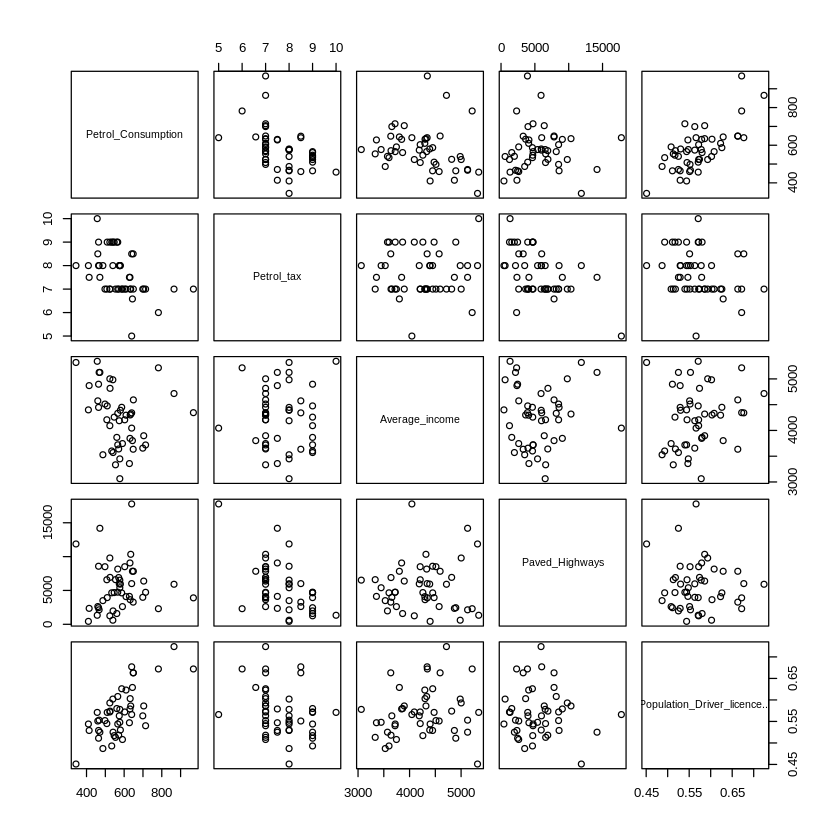

In [25]:
# visualization
pairs(~Petrol_Consumption+Petrol_tax+Average_income+Paved_Highways+Population_Driver_licence...,data = data)

In [26]:
input <- data[,c("Petrol_tax", "Population_Driver_licence...","Petrol_Consumption")]
print(head(input))

  Petrol_tax Population_Driver_licence... Petrol_Consumption
1        9.0                        0.525                541
2        9.0                        0.572                524
3        9.0                        0.580                561
4        7.5                        0.529                414
5        8.0                        0.544                410
6       10.0                        0.571                457


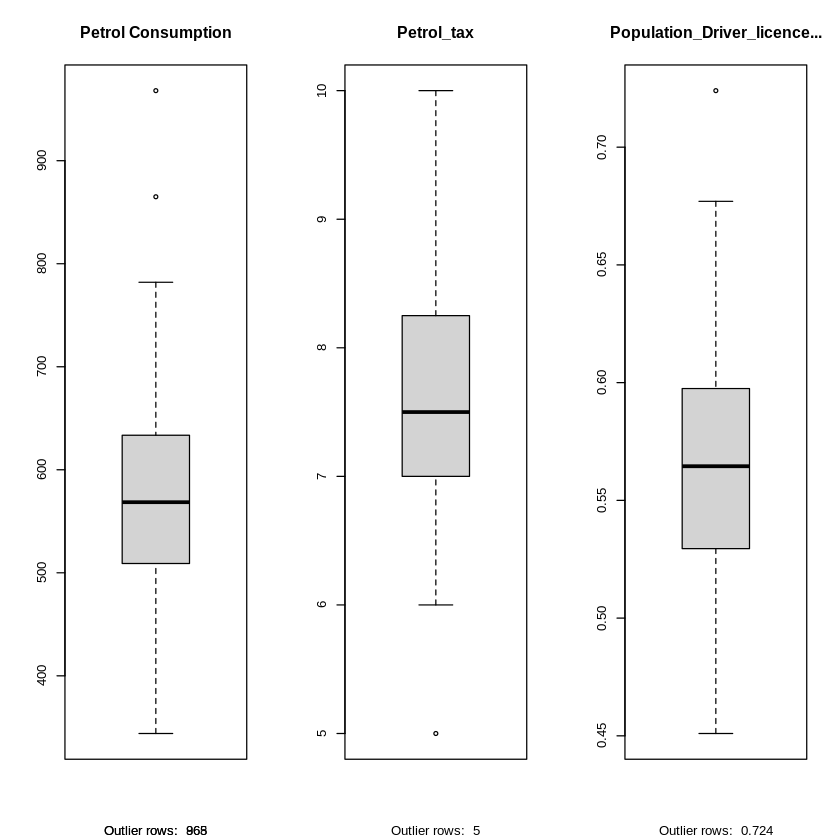

In [27]:
# BoxPlot to Check for outliers
par(mfrow=c(1, 3)) # divide graph area in 3 columns
boxplot(input$Petrol_Consumption,
main="Petrol Consumption",
sub=paste("Outlier rows: ",
boxplot.stats(input$Petrol_Consumption)$out))
boxplot(input$Petrol_tax,
main="Petrol_tax",
sub=paste("Outlier rows: ",
boxplot.stats(input$Petrol_tax)$out))
boxplot(input$Population_Driver_licence...,
main="Population_Driver_licence...",
sub=paste("Outlier rows: ",
boxplot.stats(input$Population_Driver_licence...)$out))

In [28]:
pc_outliers <- boxplot.stats(input$Petrol_Consumption)$out
print("pc_outliers: ")
print(pc_outliers)
pt_outliers <- c(boxplot.stats(input$Petrol_tax)$out)
print("pt_outliers: ")
print(pt_outliers)
pd_outliers <- c(boxplot.stats(input$Population_Driver_licence...)$out)
print("pd_outliers: ")
print(pd_outliers)

[1] "pc_outliers: "
[1] 865 968
[1] "pt_outliers: "
[1] 5
[1] "pd_outliers: "
[1] 0.724


In [29]:
#drop rows have outliers
print(paste("Before drop:", nrow(input)))
for (record in pc_outliers){
input <- input[input$Petrol_Consumption != record,]
}
for (record in pt_outliers)
{
input <- input[input$Petrol_tax != record,]
}
for (record in pd_outliers)
{
input <- input[input$Population_Driver_licence... != record,]
}
print(paste("After drop:", nrow(input)))

[1] "Before drop: 48"
[1] "After drop: 45"


In [30]:
# calculate correlation between
print("Correlations pc vs pt and pdl:")
print(cor(input$Petrol_Consumption,
input$Petrol_tax))
print(cor(input$Petrol_Consumption,
input$Population_Driver_licence...))

[1] "Correlations pc vs pt and pdl:"
[1] -0.4629515
[1] 0.6052256


In [31]:
# Create the training (development) and test (validation) data.
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(input), 0.8*nrow(input))
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData <- input[trainingRowIndex, ] # training data
testData <- input[-trainingRowIndex, ] # test data
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))


[1] "Selected training row indexes:"
 [1] 37  1 25 10 36 18 24  7 41 43 20 26  3  9 45 27  4  5 13 28 35  2  8 33 44
[26] 42 11 15 23 29 16  6 39 12 34 40
[1] "Rows of training data and test data:"
[1] 36
[1] 9


In [32]:
# Create the relationship model.
lmMod <- lm(Petrol_Consumption~Petrol_tax+Population_Driver_licence...,
data = trainingData)
cPred <- predict(lmMod, testData) # predict Petrol Consumption
# mean square error according to model
mse <- mean(lmMod$residuals^2)
print(paste("mse: ", mse))
# mean square error of testData
mse_test = mean((testData$Petrol_Consumption - cPred)^2)
print(paste("mse in test: ", mse_test))

[1] "mse:  4739.38834330754"
[1] "mse in test:  1247.25293774594"


In [33]:
# Show the model.
print(summary(lmMod))



Call:
lm(formula = Petrol_Consumption ~ Petrol_tax + Population_Driver_licence..., 
    data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.16  -61.70    7.70   58.74  151.40 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    256.26     221.90   1.155  0.25647   
Petrol_tax                     -31.34      14.47  -2.166  0.03762 * 
Population_Driver_licence...   973.59     270.33   3.602  0.00103 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 71.9 on 33 degrees of freedom
Multiple R-squared:  0.457,	Adjusted R-squared:  0.4241 
F-statistic: 13.89 on 2 and 33 DF,  p-value: 4.205e-05



In [34]:
# => r^2 has low value, this model fits ~ 45% data => not good!
# Get the Intercept and coefficients as vector elements.
cat("# # # # The Coefficient Values # # # ","\n")
b <- coef(lmMod)[1]
print(b)
mph <- coef(lmMod)[2]
mpd <- coef(lmMod)[3]
print(mph)
print(mpd)

# # # # The Coefficient Values # # #  
(Intercept) 
   256.2551 
Petrol_tax 
 -31.34155 
Population_Driver_licence... 
                    973.5906 


In [35]:
# new predictions
#pt = 9, pd = 0.58
x1 <- 9
x2 <- 0.58

y <- (mph*x1 + mpd*x2 + b)
print("Solution 1 - results:")
print(y)
# solution 2
y1 <- predict(lmMod, data.frame(Petrol_tax = x1,
Population_Driver_licence... = x2))
print("Solution 2 - results:")
print(y1)

[1] "Solution 1 - results:"
Petrol_tax 
  538.8637 
[1] "Solution 2 - results:"
       1 
538.8637 
